In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 874.0/874.0 kB 15.8 MB/s eta 0:00:00


In [2]:
!yolo task=detect mode=predict model=yolov8n.pt source='/content/image1.jpg'

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100% 6.25M/6.25M [00:00<00:00, 49.1MB/s]
Ultralytics YOLOv8.2.99 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 /content/image1.jpg: 448x640 1 cat, 494.3ms
Speed: 10.1ms preprocess, 494.3ms inference, 31.8ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [3]:
from ultralytics import YOLO

In [4]:
model = YOLO("yolov8m.pt")

100%|██████████| 49.7M/49.7M [00:00<00:00, 178MB/s]


In [5]:
img1='/content/image1.jpg'
results1=model.predict(img1)


image 1/1 /content/image1.jpg: 448x640 1 cat, 2771.1ms
Speed: 2.5ms preprocess, 2771.1ms inference, 2.5ms postprocess per image at shape (1, 3, 448, 640)


In [6]:
img2='/content/image2.webp'
results2=model.predict(img2)


image 1/1 /content/image2.webp: 384x640 5 persons, 1 bicycle, 2 cars, 4 motorcycles, 1 truck, 1 dog, 3 cows, 1921.6ms
Speed: 13.5ms preprocess, 1921.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


In [7]:
result1=results1[0]
result2=results2[0]

In [9]:
box = result1.boxes[0]
print("Object type:", box.cls)
print("Coordinates:", box.xyxy)
print("Probability:", box.conf)

Object type: tensor([15.])
Coordinates: tensor([[ 53.3412,  20.1920, 640.0000, 384.3834]])
Probability: tensor([0.9482])


In [10]:
print("Object type:",box.cls[0])
print("Coordinates:",box.xyxy[0])
print("Probability:",box.conf[0])

Object type: tensor(15.)
Coordinates: tensor([ 53.3412,  20.1920, 640.0000, 384.3834])
Probability: tensor(0.9482)


In [11]:
cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: 15.0
Coordinates: [53.34124755859375, 20.1920166015625, 640.0, 384.38336181640625]
Probability: 0.9482141733169556


In [13]:
cords = box.xyxy[0].tolist()
cords = [round(x) for x in cords]
class_id = result1.names[box.cls[0].item()]
conf = round(box.conf[0].item(), 2)
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: cat
Coordinates: [53, 20, 640, 384]
Probability: 0.95


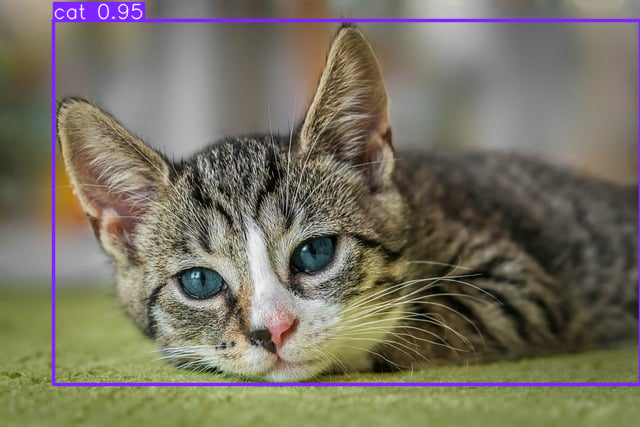

In [15]:
from PIL import Image
Image.fromarray(result1.plot()[:,:,::-1])


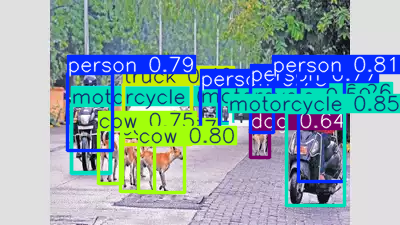

In [16]:
Image.fromarray(result2.plot()[:,:,::-1])